In [8]:
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [12]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 20,
    'page': 1,
    'sparkline': False
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame([{
    'Name': coin['name'],
    'Symbol': coin['symbol'].upper(),
    'Price (USD)': coin['current_price'],
    'Market Cap': coin['market_cap'],
    '24h Change (%)': coin['price_change_percentage_24h']
} for coin in data])

df.head()


,Name,Symbol,Price (USD),Market Cap,24h Change (%)
0,Bitcoin,BTC,117584.00,2339214893666,-0.40151
1,Ethereum,ETH,2940.53,355013265321,-2.07273
2,XRP,XRP,2.74,161751734175,-4.04840
3,Tether,USDT,1.00,159430563911,-0.00943
4,BNB,BNB,684.71,99893745715,-1.40287


In [15]:
df.to_csv('top_20_crypto.csv', index=False)




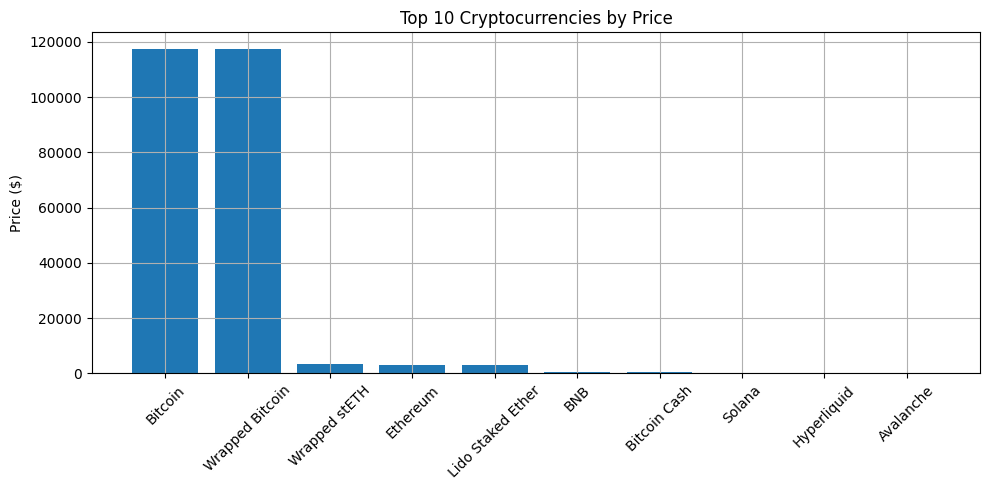

In [16]:
import matplotlib.pyplot as plt

top10 = df.sort_values(by='Price (USD)', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10['Name'], top10['Price (USD)'])
plt.xticks(rotation=45)
plt.ylabel('Price ($)')
plt.title('Top 10 Cryptocurrencies by Price')
plt.grid(True)
plt.tight_layout()
plt.show()
